In [76]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

# Read the City and Ride Data
df_city = pd.read_csv(city_data_to_load)
df_city.head()
df_ride = pd.read_csv(ride_data_to_load)
df_ride.head()
# Combine the data into a single dataset
combine = pd.merge(df_ride,df_city,on = "city", how = "outer")
# Display the data table for preview
combine.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,Lake Jonathanshire,2018-04-07 20:51:11,31.25,4441251834598,5,Urban
2,Lake Jonathanshire,2018-03-09 23:45:55,19.89,2389495660448,5,Urban
3,Lake Jonathanshire,2018-04-07 18:09:21,24.28,7796805191168,5,Urban
4,Lake Jonathanshire,2018-01-02 14:14:50,13.89,424254840012,5,Urban


In [77]:
combine.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,Lake Jonathanshire,2018-04-07 20:51:11,31.25,4441251834598,5,Urban
2,Lake Jonathanshire,2018-03-09 23:45:55,19.89,2389495660448,5,Urban
3,Lake Jonathanshire,2018-04-07 18:09:21,24.28,7796805191168,5,Urban
4,Lake Jonathanshire,2018-01-02 14:14:50,13.89,424254840012,5,Urban


## Bubble Plot of Ride Sharing Data

In [78]:
# Obtain the x and y coordinates for each of the three city types
combine_city= combine.groupby(["city","type"])
avg_fare = combine_city ["fare"].mean()
total_number = combine_city["city"].count()
total_number
total_driver = combine_city["driver_count"].mean()
df= pd.DataFrame({"average fare": avg_fare, "total rider":total_number,"total driver":total_driver})
df=df.reset_index()
df_urban = df.loc[df["type"] == "Urban",:]
df_rural = df.loc[df["type"] == "Rural",:]
df_suburban=df.loc[df["type"] == "Suburban",:]

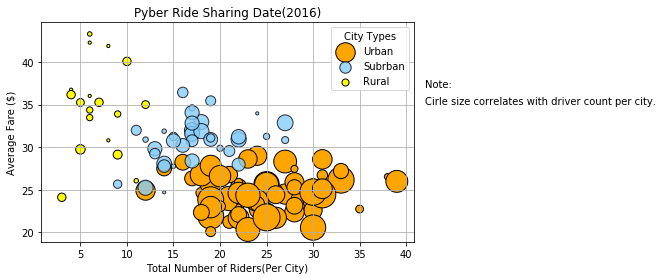

In [108]:
# Build the scatter plots for each city types

ax = df_urban.plot(kind = "scatter", x = "total rider", y ="average fare", c ='orange',s = df_urban["total driver"]*10 , grid = True, label = "Urban",edgecolors="black")
ax1=df_suburban.plot(kind = "scatter", x = "total rider", y ="average fare", c ='lightskyblue',alpha=.8,edgecolors="black",
                     s = df_suburban["total driver"]*10  , grid = True, title = "Pyber Ride Sharing Date(2016)",label = "Subrban", ax=ax)
ax2=df_rural.plot(kind = "scatter", x = "total rider", y ="average fare", c ='yellow',edgecolors="black",
                     s = df_rural["total driver"]*10  , grid = True, label ='Rural',ax=ax)

# Incorporate the other graph properties
ax.set_xlabel("Total Number of Riders(Per City)")
ax.set_ylabel("Average Fare ($)")
# Create a legend
ax.legend()
plt.legend(title = "City Types")
# Incorporate a text label regarding circle size
ax.text(42,37,"Note:")
ax.text(42,35,"Cirle size correlates with driver count per city.")
plt.tight_layout()
# Save Figure
plt.savefig("Pyber Ride sharing Bubble Plot.png")


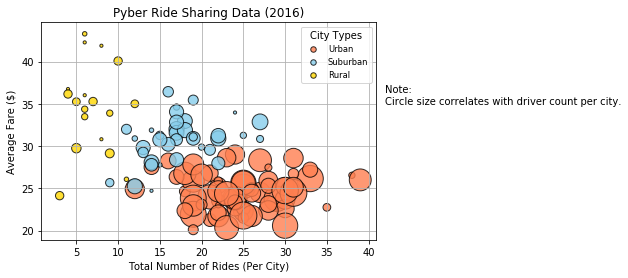

In [3]:
# Show plot
plt.show()

## Total Fares by City Type

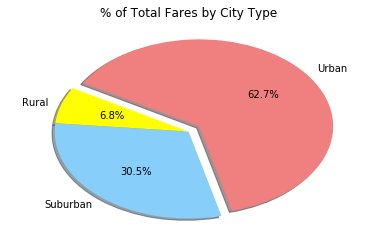

In [137]:
# Calculate Type Percents
combine_type= combine.groupby(["type"])
total_fare = combine_type ["fare"].sum()
df_1 = pd.DataFrame({"Total Fare":total_fare})
# Build Pie Chart
colors = [ "yellow", "lightskyblue","lightcoral"]
explode = (0, 0, 0.1)
df_1.plot(kind = "pie",y=df_1.keys(), explode=explode,colors=colors,
          autopct="%1.1f%%",startangle=150, title ="% of Total Fares by City Type", legend= False,shadow=True)
plt.axis('off')
# Save Figure
plt.savefig("% of Total Fares by City Type - Pie Chart.png")

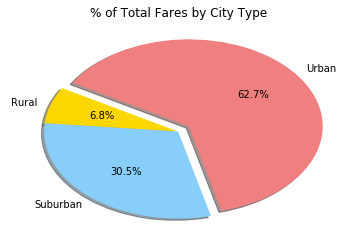

In [4]:
# Show Figure
plt.show()

## Total Rides by City Type

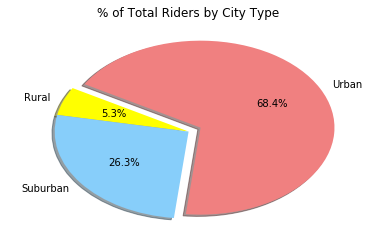

In [138]:
# Calculate Ride Percents
total_rider = combine_type["ride_id"].count()
df_2 = pd.DataFrame({"Total Rider":total_rider})
# Build Pie Chart
colors = [ "yellow", "lightskyblue","lightcoral"]
explode = (0, 0, 0.1)
df_2.plot(kind = "pie",y=df_2.keys(), explode=explode,colors=colors,
          autopct="%1.1f%%",startangle=150, title ="% of Total Riders by City Type", legend= False,shadow=True)
plt.axis('off')

# Save Figure
plt.savefig("% of Total Riders by City Type - Pie Chart")

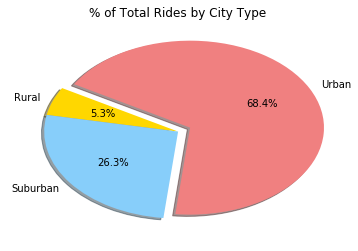

In [5]:
# Show Figure
plt.show()

## Total Drivers by City Type

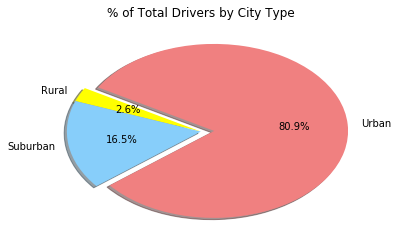

In [140]:
# Calculate Driver Percents
df_type = df.groupby("type")
total_drivers = df_type["total driver"].sum()
df_3 = pd.DataFrame({"Total Drivers":total_drivers})
df_3
# Build Pie Charts
pie_chart3 = df_3.plot(kind = "pie",y=df_3.keys(), explode=explode,colors=colors,
          autopct="%1.1f%%",startangle=150, title ="% of Total Drivers by City Type", legend= False,shadow=True)
plt.axis('off')
# Save Figure
plt.savefig("% of Total Drivers by City Type - Pie Chart")

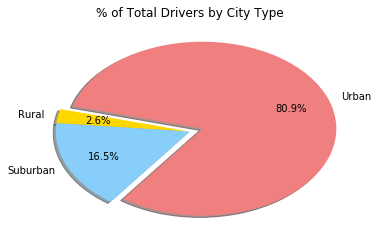

In [6]:
# Show Figure
plt.show()